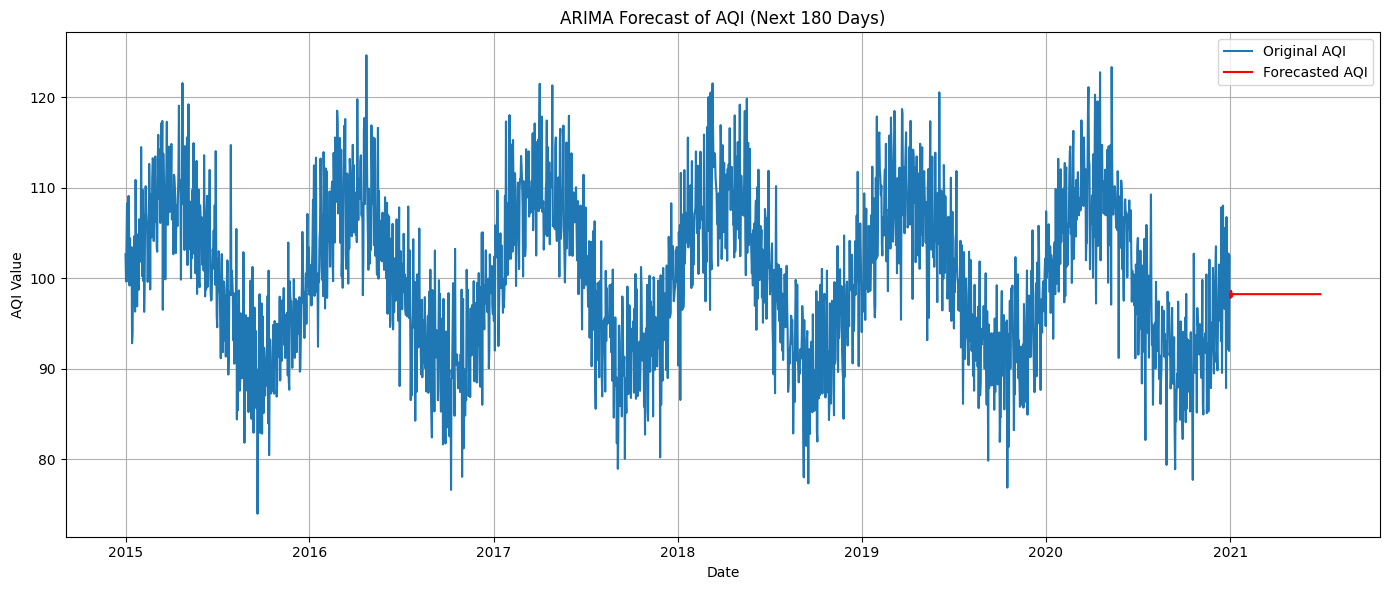

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Step 1: Generate synthetic AQI dataset for India
np.random.seed(42)
date_range = pd.date_range(start='2015-01-01', end='2020-12-31', freq='D')
aqi_values = 100 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365.25) + np.random.normal(0, 5, len(date_range))

df = pd.DataFrame({
    'Date': date_range,
    'Country': 'India',
    'AQI Value': aqi_values
})

# Step 2: Prepare time series
df_country = df[df['Country'] == 'India'].groupby("Date")['AQI Value'].mean()
df_country = df_country.asfreq('D')
df_country = df_country.interpolate()

# Optional: Plot ACF and PACF to choose (p, d, q)
# plot_acf(df_country.diff().dropna(), lags=30)
# plot_pacf(df_country.diff().dropna(), lags=30)
# plt.show()

# Step 3: Fit ARIMA model (ARIMA(p, d, q))
# You can adjust (p,d,q) based on your ACF/PACF plots — here we use (5,1,2) as example
model = ARIMA(df_country, order=(5, 1, 2))
model_fit = model.fit()

# Step 4: Forecast next 180 days
forecast_steps = 180
forecast = model_fit.forecast(steps=forecast_steps)

# Step 5: Plot original + forecast
plt.figure(figsize=(14, 6))
plt.plot(df_country, label='Original AQI')
plt.plot(forecast.index, forecast, label='Forecasted AQI', color='red')
plt.title('ARIMA Forecast of AQI (Next 180 Days)')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

